# 2D optimisation

This notebook shows how to load a model available in the models folder and use it as the unknown target function in a BOSS optimisation run. The notebook also shows how to increase iteration limit to continue optimisation.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from boss.bo.bo_main import BOMain
from utils import load_model

optimisation setup:

In [3]:
seed = 240618
normalise_scale = True  # note: default is false
num_init = 5
num_iter = 15
acqfn_name = 'elcb'

optimisation task 0:

In [4]:
unknown_model_0 = load_model('../models/model_2D_E0.npz')
bounds = [[-50.0, 310.0]] * 2
yrange = [0, 20]

In [5]:
def f(x):
    return unknown_model_0.predict(np.atleast_2d(x))[0]

plot:

In [6]:
xp = np.linspace(-50, 310, 361)
x1, x2 = np.meshgrid(xp, xp)
levels = 25

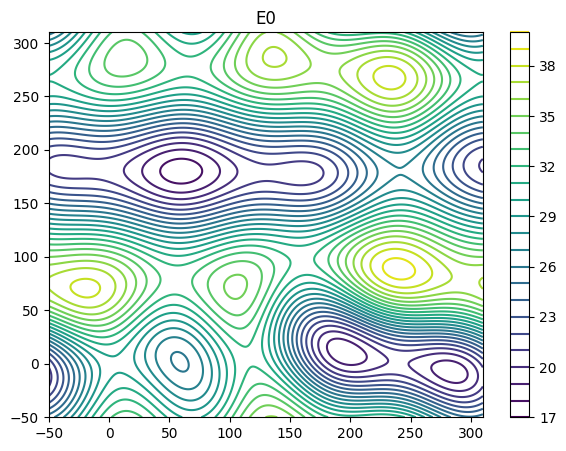

In [7]:
plt.figure(figsize=(7, 5))
yp = f(np.column_stack((x1.ravel(), x2.ravel())))
cset = plt.contour(xp, xp, yp.reshape(len(xp), len(xp)), levels=levels)
plt.colorbar(cset)
plt.title('E0');

run optimisation:

In [8]:
bo_1 = BOMain(
    f, 
    bounds,
    yrange=yrange,
    kernel='stdp',
    initpts=num_init,
    iterpts=num_iter,
    acqfn_name=acqfn_name,
    ynorm=normalise_scale,
    seed=seed,
    outfile='boss_2D_E0.out',
    rstfile='boss_2D_E0.rst',
)

In [9]:
%time res_1 = bo_1.run()

CPU times: user 10.9 s, sys: 3.02 s, total: 14 s
Wall time: 7.35 s


observed output range:

In [10]:
res_1.get_est_yrange()

(17.908983719468292, 37.26899458735576)

best observed value:

In [11]:
res_1.get_best_acq()

(ObsAr([ 72.6396469 , 174.24745908]), array([17.90898372]))

estimated minimum and predicted minimum value:

In [12]:
[res_1.select('x_glmin', -1), res_1.select('mu_glmin', -1)]

[array([ 64.68025487, 182.27107393]), 17.58015769807676]

evaluate estimated minimum:

In [13]:
f(res_1.select('x_glmin', -1))

array([[17.54216617]])

In [14]:
res_1['Y'].shape

(20, 1)

plot:

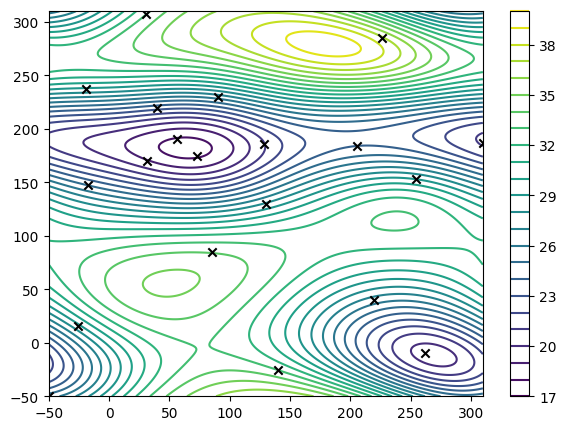

In [15]:
plt.figure(figsize=(7, 5))
yp = bo_1.model.predict(np.column_stack((x1.ravel(),x2.ravel())))[0]
cset = plt.contour(xp, xp, yp.reshape(len(xp),len(xp)), levels=levels)
plt.colorbar(cset)
plt.scatter(bo_1.model.X[:, 0], bo_1.model.X[:, 1], marker='x', color='k', zorder=10);

optimisation task 1:

In [16]:
unknown_model_1 = load_model('../models/model_2D_E1.npz')
bounds = [[-50.0, 310.0]] * 2
yrange = [0, 1]

In [17]:
def f(x):
    return unknown_model_1.predict(np.atleast_2d(x))[0]

plot:

In [18]:
xp = np.linspace(-50, 310, 361)
x1, x2 = np.meshgrid(xp, xp)
levels = 25

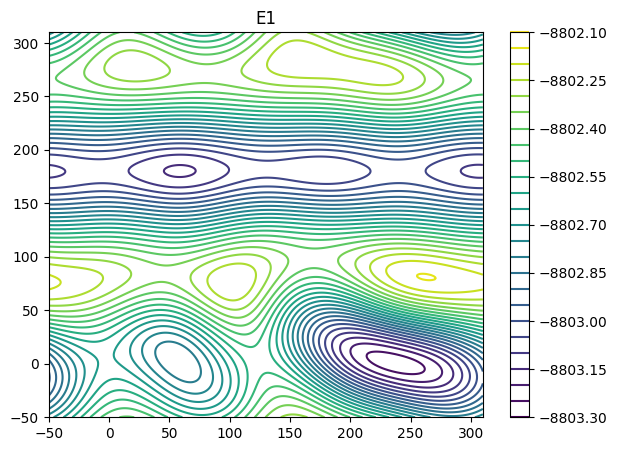

In [19]:
plt.figure(figsize=(7, 5))
yp = f(np.column_stack((x1.ravel(), x2.ravel())))
cset = plt.contour(xp, xp, yp.reshape(len(xp), len(xp)), levels=levels)
plt.colorbar(cset)
plt.title('E1');

run optimisation:

In [20]:
bo_2 = BOMain(
    f, 
    bounds,
    yrange=yrange,
    kernel='stdp',
    initpts=num_init,
    iterpts=num_iter,
    acqfn_name=acqfn_name,
    ynorm=normalise_scale,
    seed=seed,
    outfile='boss_2D_E1.out',
    rstfile='boss_2D_E1.rst',
    updaterestarts=1,
)

In [21]:
%time res_2 = bo_2.run()

CPU times: user 10.4 s, sys: 2.99 s, total: 13.4 s
Wall time: 6.43 s


In [22]:
res_2.get_est_yrange()

(-8803.271387339235, -8802.224767561913)

see optimisation results:

In [23]:
res_2.get_best_acq()

(ObsAr([227.7047509,   5.4269517]), array([-8803.27138734]))

In [24]:
[res_2.select('x_glmin', -1), res_2.select('mu_glmin', -1)]

[array([239.02764476,   2.58695258]), -8803.287641181585]

evaluate estimated minimum:

In [25]:
f(res_2.select('x_glmin', -1))

array([[-8803.27501181]])

plot:

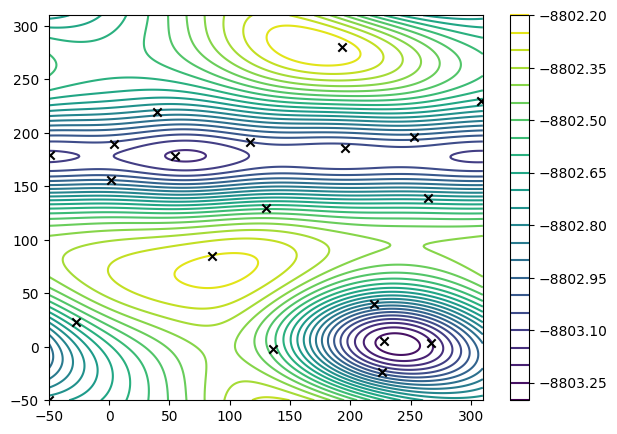

In [26]:
plt.figure(figsize=(7, 5))
yp = bo_2.model.predict(np.column_stack((x1.ravel(), x2.ravel())))[0]
cset = plt.contour(xp, xp, yp.reshape(len(xp), len(xp)), levels=levels)
plt.colorbar(cset)
plt.scatter(bo_2.model.X[:, 0], bo_2.model.X[:, 1], marker='x', color='k', zorder=10);

continue optimisation with 5 more iterations:

In [27]:
new_iterpts = num_iter + 5

In [28]:
%time res_2 = bo_2.run(iterpts=new_iterpts)

CPU times: user 5.21 s, sys: 1.43 s, total: 6.64 s
Wall time: 2.9 s


see optimisation results:

In [29]:
res_2.get_best_acq()

(ObsAr([227.7047509,   5.4269517]), array([-8803.27138734]))

In [30]:
[res_2.select('x_glmin', -1), res_2.select('mu_glmin', -1)]

[array([235.45593251,   0.4974624 ]), -8803.28194336941]

evaluate estimated minimum:

In [31]:
f(res_2.select('x_glmin', -1))

array([[-8803.27676329]])

plot:

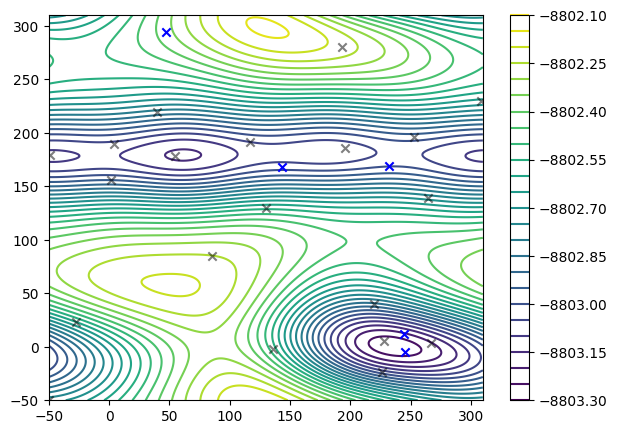

In [32]:
plt.figure(figsize=(7, 5))
yp = bo_2.model.predict(np.column_stack((x1.ravel(), x2.ravel())))[0]
cset = plt.contour(xp, xp, yp.reshape(len(xp), len(xp)), levels=levels)
plt.colorbar(cset)
num_prev = num_init + num_iter
plt.scatter(bo_2.model.X[:num_prev, 0], bo_2.model.X[:num_prev, 1], marker='x', color='k', zorder=10, alpha=0.5);
plt.scatter(bo_2.model.X[num_prev:, 0], bo_2.model.X[num_prev:, 1], marker='x', color='b', zorder=10);